# Data Pipelines - Data Collection Exercise 

### Objective: web-scrape information, transform it as required and then save it as a cleaned .csv file.

**Aim:** Scrape, transform and save the race results table for the 2022 formula 1 season from wikipedia.

*What the table looks like on wikipedia:*
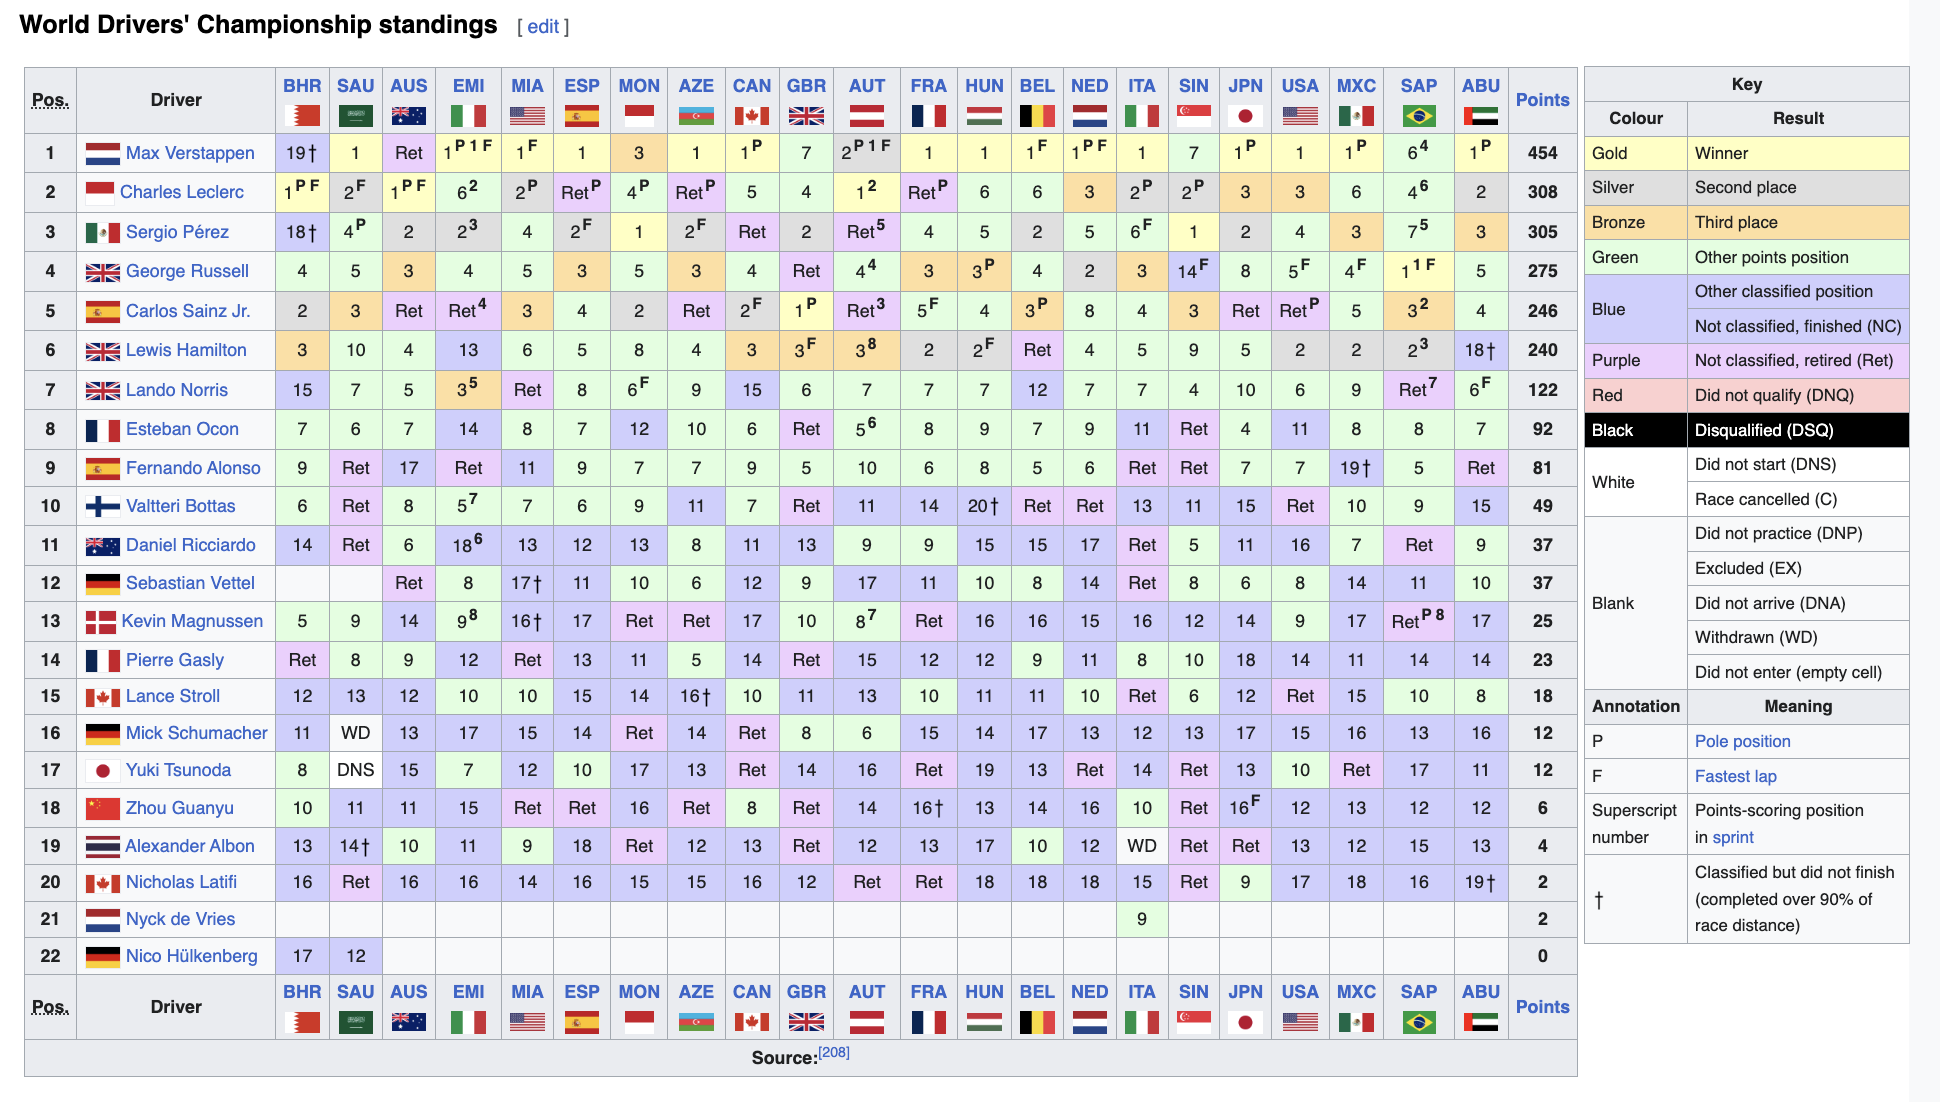

**Challenges**

This data is very messy and has lots of extra information I do not care about for this project. Cleaning will be required.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
# URL of the Wikipedia page I want to scrape
url = "https://en.wikipedia.org/wiki/2022_Formula_One_World_Championship"

# Send a GET request
response = requests.get(url)

# Create a BeautifulSoup object from the response text
soup = BeautifulSoup(response.text, "html.parser")

# Find the table with the World Drivers' Championship standings
tables = soup.findAll("table")

# The above will find ALL tables on the webpage so we need to check headers to find the right table
for i,table in enumerate(tables):
    headers = table.findAll("th")
    header_data = [header.text.strip() for header in headers]
    print(f"Table at index {i} has headers:\n {header_data}\n")

Table at index 0 has headers:
 ['Entrant', 'Constructor', 'Chassis', 'Power unit', 'Race drivers', 'No.', 'Driver name', 'Rounds', 'Alfa Romeo-Ferrari', 'AlphaTauri-RBPT', 'Alpine-Renault', 'Aston Martin Aramco-Mercedes', 'Ferrari', 'Haas-Ferrari', 'McLaren-Mercedes', 'Mercedes', 'Red Bull Racing-RBPT', 'Williams-Mercedes']

Table at index 1 has headers:
 ['Constructor', 'Driver', 'Rounds', 'Alfa Romeo-Ferrari[d]', 'AlphaTauri-RBPT', 'Alpine-Renault', 'Aston Martin Aramco-Mercedes', 'Ferrari', 'Haas-Ferrari', 'McLaren-Mercedes', 'Mercedes', 'Red Bull Racing-RBPT', 'Williams-Mercedes']

Table at index 2 has headers:
 ['Round', 'Grand Prix', 'Circuit', 'Race date', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22']

Table at index 3 has headers:
 ['Round', 'Grand Prix[i]', 'Pole position', 'Fastest lap', 'Winning driver', 'Winning constructor', 'Report', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', 

The relevant table is located at index 5

In [3]:
results_table = tables[5]

# Extract the table rows
rows = results_table.findAll("tr")

# Extract the table headers
headers = rows[0].findAll("th")
header_data = [header.text.strip() for header in headers] 

# Checked what the header_data looks like
print(header_data)

['Pos.', 'Driver', 'BHR', 'SAU', 'AUS', 'EMI', 'MIA', 'ESP', 'MON', 'AZE', 'CAN', 'GBR', 'AUT', 'FRA', 'HUN', 'BEL', 'NED', 'ITA', 'SIN', 'JPN', 'USA', 'MXC', 'SAP', 'ABU', 'Points', '1', '454', '2', '308', '3', '305', '4', '275', '5', '246', '6', '240', '7', '122', '8', '92', '9', '81', '10', '49', '11', '37', '12', '37', '13', '25', '14', '23', '15', '18', '16', '12', '17', '12', '18', '6', '19', '4', '20', '2', '21', '2', '22', '0', 'Pos.', 'Driver', 'BHR', 'SAU', 'AUS', 'EMI', 'MIA', 'ESP', 'MON', 'AZE', 'CAN', 'GBR', 'AUT', 'FRA', 'HUN', 'BEL', 'NED', 'ITA', 'SIN', 'JPN', 'USA', 'MXC', 'SAP', 'ABU', 'Points', 'Source:[208]', 'Key', 'Colour', 'Result', 'Annotation', 'Meaning']


In [4]:
clean_headers = header_data[1:24]
# The slice here extracts table headers

points_data = header_data[26::2][:22]
# The slice here extracts point totals 

print(f'clean_headers = {clean_headers}')
print(f'points_data = {points_data}')

clean_headers = ['Driver', 'BHR', 'SAU', 'AUS', 'EMI', 'MIA', 'ESP', 'MON', 'AZE', 'CAN', 'GBR', 'AUT', 'FRA', 'HUN', 'BEL', 'NED', 'ITA', 'SIN', 'JPN', 'USA', 'MXC', 'SAP', 'ABU']
points_data = ['454', '308', '305', '275', '246', '240', '122', '92', '81', '49', '37', '37', '25', '23', '18', '12', '12', '6', '4', '2', '2', '0']


In [5]:
# Extract driver data
row_data = []
for row in rows[1:]:
    row_info = []
    for data in row.findAll("td"):
        # Remove span elements
        for span in data.findAll("span"):
            span.extract()
        # Get the stripped text
        text = data.text.strip()
        row_info.append(text)
    row_data.append(row_info)

# Checked what the row_data looks like
print(row_data[:5])
print()

# Checked counts per row
print('list length per row:')
for i,row in enumerate(row_data):
    print(i,len(row))

[[], ['Max Verstappen', '19', '1', 'Ret', '1', '1', '1', '3', '1', '1', '7', '2', '1', '1', '1', '1', '1', '7', '1', '1', '1', '6', '1'], ['Charles Leclerc', '1', '2', '1', '6', '2', 'Ret', '4', 'Ret', '5', '4', '1', 'Ret', '6', '6', '3', '2', '2', '3', '3', '6', '4', '2'], ['Sergio Pérez', '18', '4', '2', '2', '4', '2', '1', '2', 'Ret', '2', 'Ret', '4', '5', '2', '5', '6', '1', '2', '4', '3', '7', '3'], ['George Russell', '4', '5', '3', '4', '5', '3', '5', '3', '4', 'Ret', '4', '3', '3', '4', '2', '3', '14', '8', '5', '4', '1', '5']]

list length per row:
0 0
1 23
2 23
3 23
4 23
5 23
6 23
7 23
8 23
9 23
10 23
11 23
12 23
13 23
14 23
15 23
16 23
17 23
18 23
19 23
20 23
21 23
22 23
23 0
24 0
25 0
26 0
27 2
28 2
29 2
30 2
31 2
32 1
33 2
34 2
35 2
36 2
37 1
38 2
39 1
40 1
41 1
42 1
43 0
44 2
45 2
46 2
47 2


In [6]:
clean_row_data = row_data[1:23]

print('clean_row_data:\n')
for row in clean_row_data[:5]:
    print(row)

clean_row_data:

['Max Verstappen', '19', '1', 'Ret', '1', '1', '1', '3', '1', '1', '7', '2', '1', '1', '1', '1', '1', '7', '1', '1', '1', '6', '1']
['Charles Leclerc', '1', '2', '1', '6', '2', 'Ret', '4', 'Ret', '5', '4', '1', 'Ret', '6', '6', '3', '2', '2', '3', '3', '6', '4', '2']
['Sergio Pérez', '18', '4', '2', '2', '4', '2', '1', '2', 'Ret', '2', 'Ret', '4', '5', '2', '5', '6', '1', '2', '4', '3', '7', '3']
['George Russell', '4', '5', '3', '4', '5', '3', '5', '3', '4', 'Ret', '4', '3', '3', '4', '2', '3', '14', '8', '5', '4', '1', '5']
['Carlos Sainz Jr.', '2', '3', 'Ret', 'Ret', '3', '4', '2', 'Ret', '2', '1', 'Ret', '5', '4', '3', '8', '4', '3', 'Ret', 'Ret', '5', '3', '4']


Create the dataframe

In [7]:
f1_2022_df = pd.DataFrame(
    clean_row_data,
    columns=clean_headers
)

In [8]:
f1_2022_df

,Driver,BHR,SAU,AUS,EMI,MIA,ESP,MON,AZE,CAN,...,HUN,BEL,NED,ITA,SIN,JPN,USA,MXC,SAP,ABU
0,Max Verstappen,19,1,Ret,1,1,1,3,1,1,...,1,1,1,1,7,1,1,1,6,1
1,Charles Leclerc,1,2,1,6,2,Ret,4,Ret,5,...,6,6,3,2,2,3,3,6,4,2
2,Sergio Pérez,18,4,2,2,4,2,1,2,Ret,...,5,2,5,6,1,2,4,3,7,3
3,George Russell,4,5,3,4,5,3,5,3,4,...,3,4,2,3,14,8,5,4,1,5
4,Carlos Sainz Jr.,2,3,Ret,Ret,3,4,2,Ret,2,...,4,3,8,4,3,Ret,Ret,5,3,4
5,Lewis Hamilton,3,10,4,13,6,5,8,4,3,...,2,Ret,4,5,9,5,2,2,2,18
6,Lando Norris,15,7,5,3,Ret,8,6,9,15,...,7,12,7,7,4,10,6,9,Ret,6
7,Esteban Ocon,7,6,7,14,8,7,12,10,6,...,9,7,9,11,Ret,4,11,8,8,7
8,Fernando Alonso,9,Ret,17,Ret,11,9,7,7,9,...,8,5,6,Ret,Ret,7,7,19,5,Ret
9,Valtteri Bottas,6,Ret,8,5,7,6,9,11,7,...,20,Ret,Ret,13,11,15,Ret,10,9,15


In [9]:
f1_2022_df['Pos'] = list(range(1,23))
f1_2022_df.set_index('Pos', inplace=True)
f1_2022_df

,Driver,BHR,SAU,AUS,EMI,MIA,ESP,MON,AZE,CAN,...,HUN,BEL,NED,ITA,SIN,JPN,USA,MXC,SAP,ABU
Pos,,,,,,,,,,,,,,,,,,,,,
1,Max Verstappen,19,1,Ret,1,1,1,3,1,1,...,1,1,1,1,7,1,1,1,6,1
2,Charles Leclerc,1,2,1,6,2,Ret,4,Ret,5,...,6,6,3,2,2,3,3,6,4,2
3,Sergio Pérez,18,4,2,2,4,2,1,2,Ret,...,5,2,5,6,1,2,4,3,7,3
4,George Russell,4,5,3,4,5,3,5,3,4,...,3,4,2,3,14,8,5,4,1,5
5,Carlos Sainz Jr.,2,3,Ret,Ret,3,4,2,Ret,2,...,4,3,8,4,3,Ret,Ret,5,3,4
6,Lewis Hamilton,3,10,4,13,6,5,8,4,3,...,2,Ret,4,5,9,5,2,2,2,18
7,Lando Norris,15,7,5,3,Ret,8,6,9,15,...,7,12,7,7,4,10,6,9,Ret,6
8,Esteban Ocon,7,6,7,14,8,7,12,10,6,...,9,7,9,11,Ret,4,11,8,8,7
9,Fernando Alonso,9,Ret,17,Ret,11,9,7,7,9,...,8,5,6,Ret,Ret,7,7,19,5,Ret


In [10]:
# These driver names did not get parsed for some reason but easy enough to manually solve this issue

f1_2022_df.iat[12,0] = 'Kevin Magnussen'
f1_2022_df.iat[15,0] = 'Mick Schumacher'

In [11]:
f1_2022_df

,Driver,BHR,SAU,AUS,EMI,MIA,ESP,MON,AZE,CAN,...,HUN,BEL,NED,ITA,SIN,JPN,USA,MXC,SAP,ABU
Pos,,,,,,,,,,,,,,,,,,,,,
1,Max Verstappen,19,1,Ret,1,1,1,3,1,1,...,1,1,1,1,7,1,1,1,6,1
2,Charles Leclerc,1,2,1,6,2,Ret,4,Ret,5,...,6,6,3,2,2,3,3,6,4,2
3,Sergio Pérez,18,4,2,2,4,2,1,2,Ret,...,5,2,5,6,1,2,4,3,7,3
4,George Russell,4,5,3,4,5,3,5,3,4,...,3,4,2,3,14,8,5,4,1,5
5,Carlos Sainz Jr.,2,3,Ret,Ret,3,4,2,Ret,2,...,4,3,8,4,3,Ret,Ret,5,3,4
6,Lewis Hamilton,3,10,4,13,6,5,8,4,3,...,2,Ret,4,5,9,5,2,2,2,18
7,Lando Norris,15,7,5,3,Ret,8,6,9,15,...,7,12,7,7,4,10,6,9,Ret,6
8,Esteban Ocon,7,6,7,14,8,7,12,10,6,...,9,7,9,11,Ret,4,11,8,8,7
9,Fernando Alonso,9,Ret,17,Ret,11,9,7,7,9,...,8,5,6,Ret,Ret,7,7,19,5,Ret


Add the points data

In [12]:
f1_2022_df['Points'] = points_data

In [13]:
f1_2022_df

,Driver,BHR,SAU,AUS,EMI,MIA,ESP,MON,AZE,CAN,...,BEL,NED,ITA,SIN,JPN,USA,MXC,SAP,ABU,Points
Pos,,,,,,,,,,,,,,,,,,,,,
1,Max Verstappen,19,1,Ret,1,1,1,3,1,1,...,1,1,1,7,1,1,1,6,1,454
2,Charles Leclerc,1,2,1,6,2,Ret,4,Ret,5,...,6,3,2,2,3,3,6,4,2,308
3,Sergio Pérez,18,4,2,2,4,2,1,2,Ret,...,2,5,6,1,2,4,3,7,3,305
4,George Russell,4,5,3,4,5,3,5,3,4,...,4,2,3,14,8,5,4,1,5,275
5,Carlos Sainz Jr.,2,3,Ret,Ret,3,4,2,Ret,2,...,3,8,4,3,Ret,Ret,5,3,4,246
6,Lewis Hamilton,3,10,4,13,6,5,8,4,3,...,Ret,4,5,9,5,2,2,2,18,240
7,Lando Norris,15,7,5,3,Ret,8,6,9,15,...,12,7,7,4,10,6,9,Ret,6,122
8,Esteban Ocon,7,6,7,14,8,7,12,10,6,...,7,9,11,Ret,4,11,8,8,7,92
9,Fernando Alonso,9,Ret,17,Ret,11,9,7,7,9,...,5,6,Ret,Ret,7,7,19,5,Ret,81


Check missing values

In [14]:
f1_2022_df.isna().sum()

Driver    0
BHR       0
SAU       0
AUS       0
EMI       0
MIA       0
ESP       0
MON       0
AZE       0
CAN       0
GBR       0
AUT       0
FRA       0
HUN       0
BEL       0
NED       0
ITA       0
SIN       0
JPN       0
USA       0
MXC       0
SAP       0
ABU       0
Points    0
dtype: int64

Blank values in the table are not null but correspond to races drivers missed (and are stored in the dataframe as empty strings). Let's check this... 

In [15]:
empty_count = pd.DataFrame(f1_2022_df.apply(lambda row: str(row.str.count('^$').sum()), axis=1))
empty_count = pd.concat([f1_2022_df[['Driver']],empty_count],axis=1).rename(columns={0:'Races_missed'})
print(empty_count)

               Driver Races_missed
Pos                               
1      Max Verstappen            0
2     Charles Leclerc            0
3        Sergio Pérez            0
4      George Russell            0
5    Carlos Sainz Jr.            0
6      Lewis Hamilton            0
7        Lando Norris            0
8        Esteban Ocon            0
9     Fernando Alonso            0
10    Valtteri Bottas            0
11   Daniel Ricciardo            0
12   Sebastian Vettel            2
13    Kevin Magnussen            0
14       Pierre Gasly            0
15       Lance Stroll            0
16    Mick Schumacher            0
17       Yuki Tsunoda            0
18        Zhou Guanyu            0
19    Alexander Albon            0
20    Nicholas Latifi            0
21      Nyck de Vries           21
22    Nico Hülkenberg           20


Everything looks clean, lets export to csv

In [16]:
f1_2022_df.to_csv('f1_2022_clean.csv')